In [130]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('science')

## Imagen retículo 3D

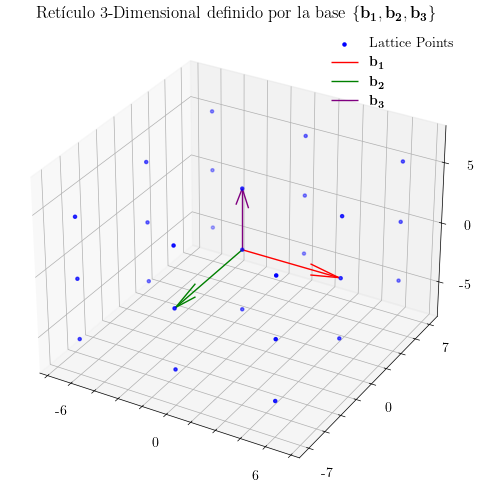

In [165]:


def generate_lattice_points_3d(basis, range_min=-2, range_max=2):

    points = []
    for i in range(range_min, range_max + 1):
        for j in range(range_min, range_max + 1):
            for k in range(range_min, range_max + 1):
                point = i * basis[:, 0] + j * basis[:, 1] + k * basis[:, 2]
                points.append(point)
    return np.array(points)

def plot_lattice_3d(ax, points, basis, title):

    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', s=5)
    
    origin = np.zeros((1, 3))
    for i in range(basis.shape[1]):
        ax.quiver(origin[0, 0], origin[0, 1], origin[0, 2], 
                  basis[0, i], basis[1, i], basis[2, i], 
                  color=['red', 'green', 'purple'][i % 3], length=10)
    
    ax.set_xlim([-8, 8])
    ax.set_ylim([-8, 8])
    ax.set_zlim([-8, 8])
    
    ax.set_title(title)
    ax.legend(['Lattice Points','$\mathbf{b_1}$','$\mathbf{b_2}$','$\mathbf{b_3}$'])
    ax.grid(True)
    

basis = np.array([[6, 0, 0], [0, 7, 0], [0, 0, 5]])
coordinates_basis = np.array([[1/1.7, 0, 0], [0, -1/1.45, 0], [0, 0, 1/2]])

lattice_points = generate_lattice_points_3d(basis, -1, 1)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

plot_lattice_3d(ax, lattice_points, coordinates_basis, 'Retículo 3-Dimensional definido por la base $\{\mathbf{b_1},\mathbf{b_2},\mathbf{b_3}\}$')

ax.set_xticks(ticks=[-6,0,6],labels=[-6,0,6])
ax.set_yticks(ticks=[-7,0,7],labels=[-7,0,7])
ax.set_zticks(ticks=[-5,0,5],labels=[-5,0,5])

plt.savefig('./warehouse/3d_lattice.svg')


# Imagen Bases En Retículo

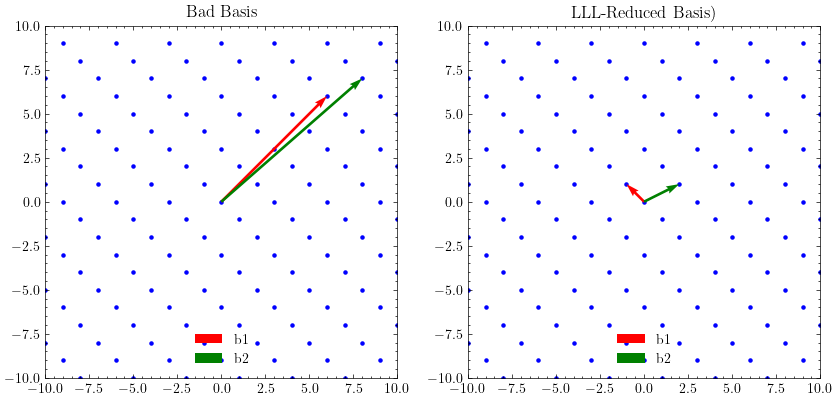

In [169]:

def generate_lattice_points(basis, range_min=-10, range_max=10):
    """Generate lattice points given a basis."""
    points = []
    for i in range(range_min, range_max):
        for j in range(range_min, range_max):
            point = i * basis[:, 0] + j * basis[:, 1]
            points.append(point)
    return np.array(points)

def plot_lattice(ax, points, basis, title):
    """Plot lattice points and basis vectors."""
    ax.scatter(points[:, 0], points[:, 1], color='blue', s=5)
    ax.quiver(0, 0, basis[0, 0], basis[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label='b1')
    ax.quiver(0, 0, basis[0, 1], basis[1, 1], angles='xy', scale_units='xy', scale=1, color='green', label='b2')
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_title(title)
    ax.legend()

# Define the basis vectors
common_basis = np.array([[3, 2], [0, 1]])  # Common basis for generating points
bad_basis = np.array([[6, 8], [6, 7]])  # Bad basis (linearly dependent)
good_basis = np.array([[-1, 2], [1, 1]])  # Good basis (LLL reduced basis)

lattice_points = generate_lattice_points(common_basis) # Generate lattice points using the common basis

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_lattice(axes[0], lattice_points, bad_basis, 'Bad Basis') # Plot the bad basis lattice
plot_lattice(axes[1], lattice_points, good_basis, 'LLL-Reduced Basis)') # Plot the good basis lattice

axes[0].grid(False)
axes[1].grid(False)

plt.savefig('./warehouse/lattices.svg')